# Customer Churn detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,fbeta_score
from sklearn.feature_selection import SelectKBest,chi2
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from mlxtend.plotting import plot_decision_regions

## importing the data

In [2]:
churn_data = pd.read_csv(r"E:\Data science\Afame tech projecct\Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data cleaning

In [3]:
churn_data[['CustomerId']].value_counts()

CustomerId
15565701      1
15732281      1
15732199      1
15732202      1
15732235      1
             ..
15649297      1
15649354      1
15649359      1
15649379      1
15815690      1
Name: count, Length: 10000, dtype: int64

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

RowNumber, CustomerId , Surname doesn't make the much impact on the target variable so droping it.

In [6]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA

In [8]:
geo_fre = churn_data[['Geography']].value_counts()
geo_fre

Geography
France       5014
Germany      2509
Spain        2477
Name: count, dtype: int64

**Number of people over different region in the data set**

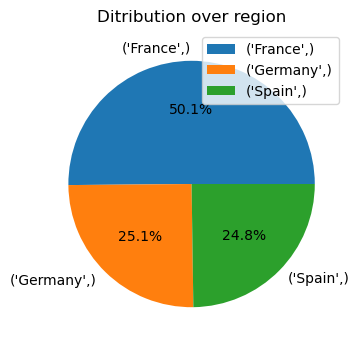

In [9]:
plt.figure(figsize=(4, 4))
plt.pie(geo_fre, labels= geo_fre.index, autopct='%1.1f%%')
plt.legend()
plt.title('Ditribution over region')
plt.show()

* 50.1% of people from France
* 25.1% of people from Germany
* 24.8% of people from Spain

In [10]:
gend_freq = churn_data[['Gender']].value_counts()
gend_freq

Gender
Male      5457
Female    4543
Name: count, dtype: int64

**Gender distrubution in the data set**

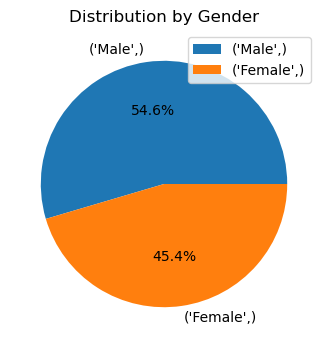

In [11]:
plt.figure(figsize=(4, 4))
plt.pie(gend_freq, labels= gend_freq.index, autopct='%1.1f%%')
plt.legend()
plt.title('Distribution by Gender')
plt.show()

* 54.6% are Male 
* 45.4% are Female

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


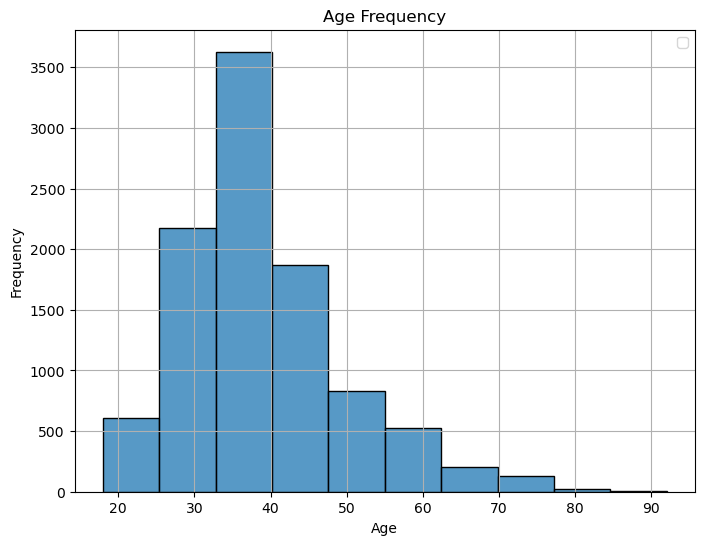

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=churn_data, x='Age', bins=10)
plt.title('Age Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

* The most of the people in the data are the age between 32 - 40 i.e 3600 people.
* Around 2300 people are the age between 25 - 32.
* Around 1800 people are having the age between 40 - 48.

In [13]:
churn_numbers = churn_data['Exited'].value_counts()
churn_numbers 

Exited
0    7963
1    2037
Name: count, dtype: int64

**Churn Rate**

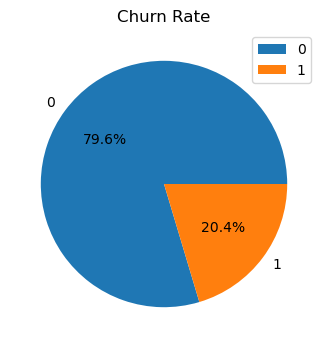

In [14]:
plt.figure(figsize=(4, 4))
plt.pie(churn_numbers, labels= churn_numbers.index, autopct='%1.1f%%')
plt.title('Churn Rate')
plt.legend()
plt.show()

* 20.4% of the people exited from the subscription.

In [15]:
gender_rate = churn_data.groupby('Gender')['Exited'].sum()
gender_rate

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

**Churn Rate by Gender**

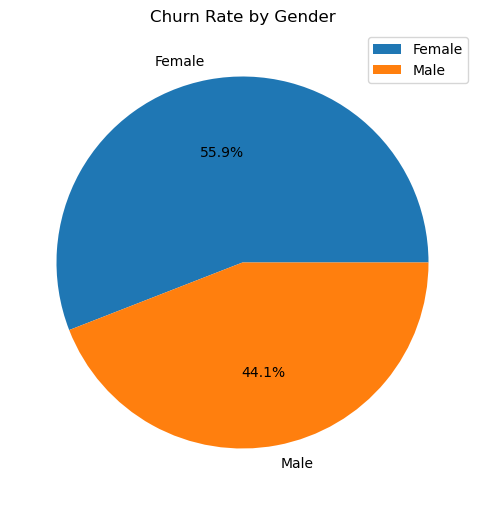

In [16]:
plt.figure(figsize=(6, 14))
plt.pie(gender_rate, labels= gender_rate.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.legend()
plt.show()

* 55.9% of the exited customers are Female.
* 44.1% are Male Customers.

In [17]:
churn_number_geo_gend = churn_data.groupby(['Geography', 'Gender'])['Exited'].sum()
churn_number_geo_gend

Geography  Gender
France     Female    460
           Male      350
Germany    Female    448
           Male      366
Spain      Female    231
           Male      182
Name: Exited, dtype: int64

**Churn Rate by Gender over different Region**

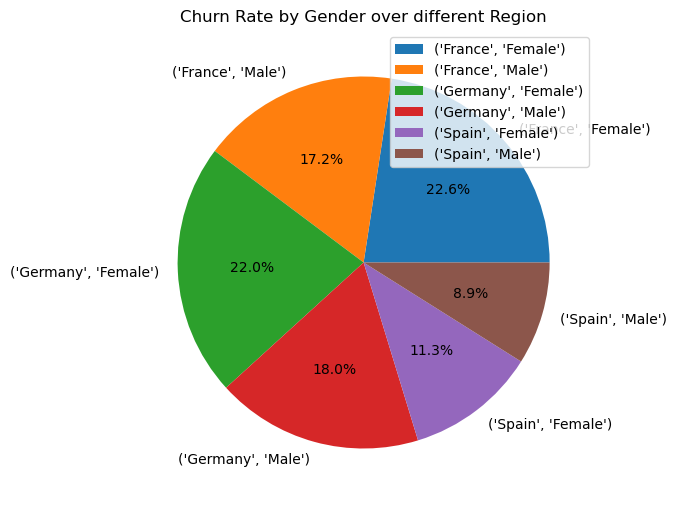

In [18]:
plt.figure(figsize=(6, 14))
plt.pie(churn_number_geo_gend, labels= churn_number_geo_gend.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender over different Region')
plt.legend()
plt.show()

**Churn Rate based on the Average Balance less the 50%**

In [19]:
churn_data.groupby(churn_data['Balance'] < 97198)['Exited'].sum()

Balance
False    1249
True      788
Name: Exited, dtype: int64

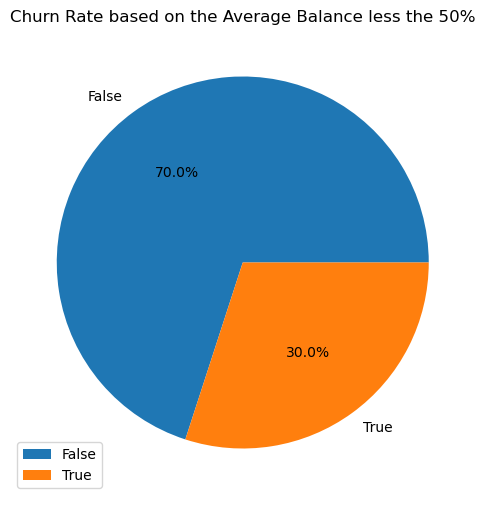

In [20]:
plt.figure(figsize=(6, 14))
plt.pie(churn_data.groupby(churn_data['Balance'] < churn_data['Balance'].mean())['Exited'].sum(), labels= churn_data.groupby(churn_data['Balance'] < 97198)['Exited'].sum().index, autopct='%1.1f%%')
plt.title('Churn Rate based on the Average Balance less the 50%')
plt.legend()
plt.show()

30% of the people exited maybe because of low balence

**Churn Rate based on the Average salary less the 50%**

In [21]:
churn_data.groupby(churn_data['EstimatedSalary'] < churn_data['EstimatedSalary'].mean())['Exited'].sum()

EstimatedSalary
False    1042
True      995
Name: Exited, dtype: int64

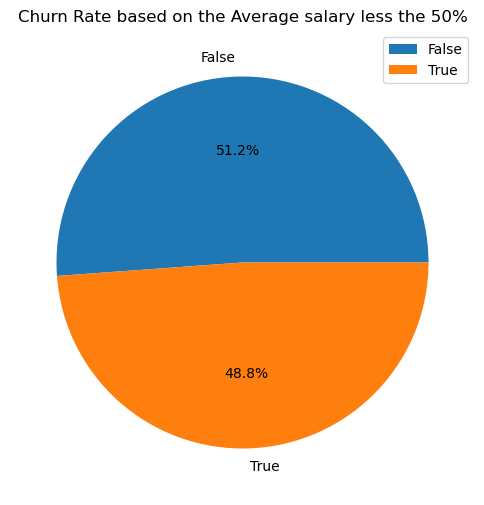

In [22]:
plt.figure(figsize=(6, 14))
plt.pie(churn_data.groupby(churn_data['EstimatedSalary'] < churn_data['EstimatedSalary'].mean())['Exited'].sum(), labels= churn_data.groupby(churn_data['Balance'] < 97198)['Exited'].sum().index, autopct='%1.1f%%')
plt.title('Churn Rate based on the Average salary less the 50%')
plt.legend()
plt.show()

In [23]:
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### converting non numeric data into numeric data

In [24]:
ohe = OneHotEncoder(sparse_output = False)

In [25]:
gender = ohe.fit_transform(churn_data[['Gender']])
gender

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [26]:
gender_ = pd.Series(gender.argmax(axis=1))

In [27]:
churn_data['Gender'] = gender_

In [28]:
geography = ohe.fit_transform(churn_data[['Geography']])
geography

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
geography_ = pd.Series(geography.argmax(axis=1))

In [30]:
churn_data['Geography'] = geography_

In [31]:
columns_ = churn_data.columns
columns_

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [32]:
churn_data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### checking the skewness of the data

In [34]:
churn_data.skew()

CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


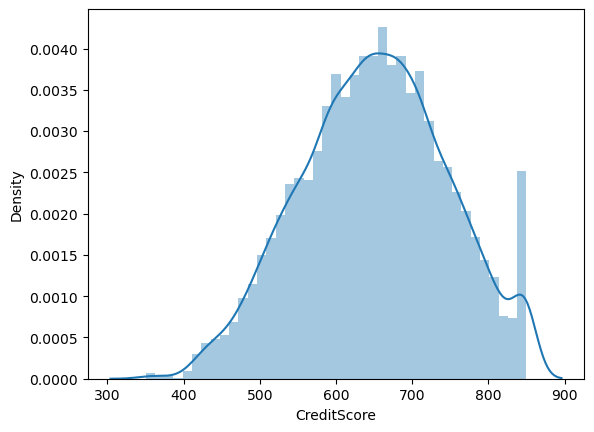

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


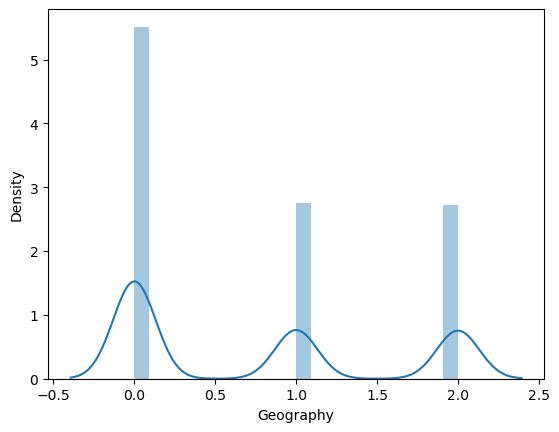

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


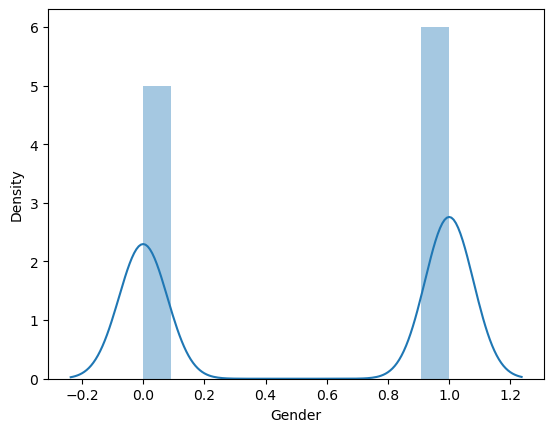

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


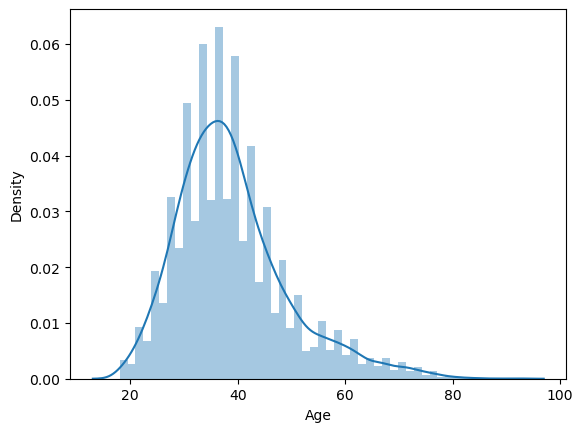

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


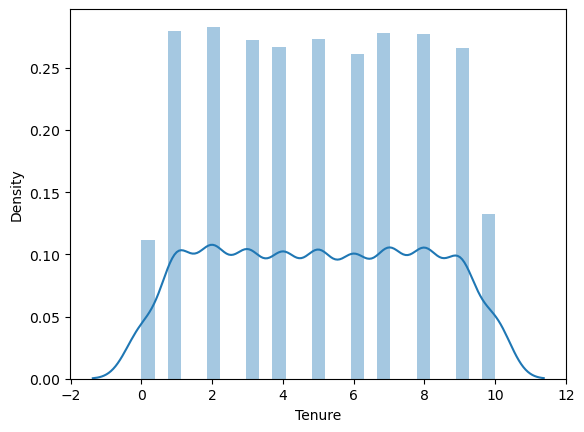

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


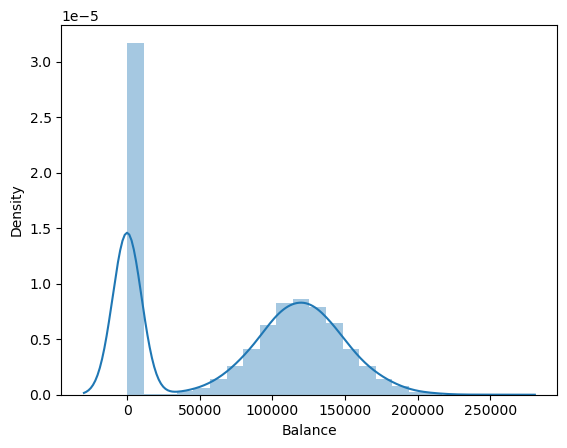

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


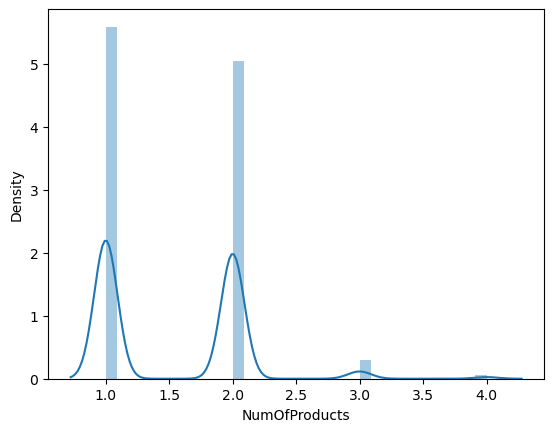

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


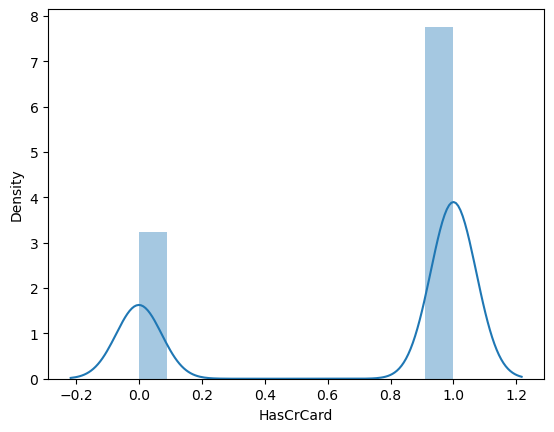

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


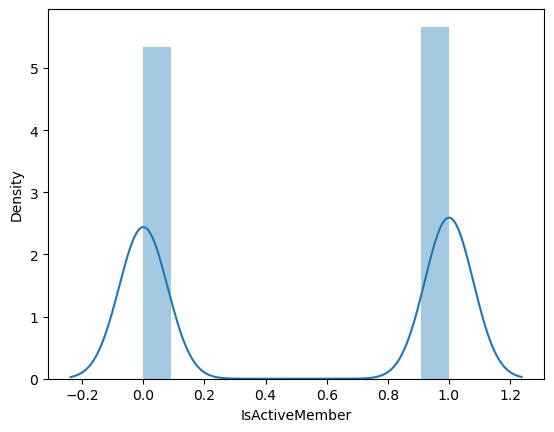

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


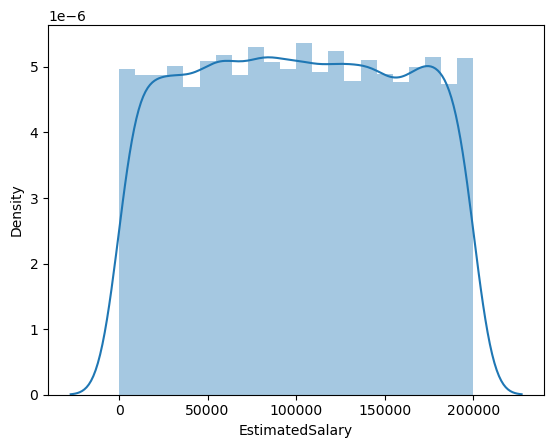

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2504686616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data[column], kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


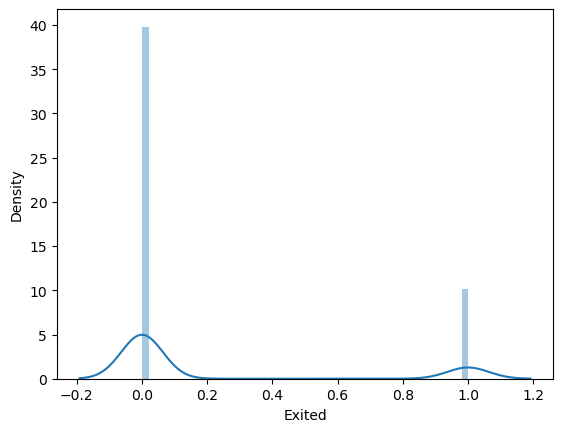

In [35]:
for column in churn_data.columns:
    sns.distplot(churn_data[column], kde=True)
    plt.show()

### Outliers Detection

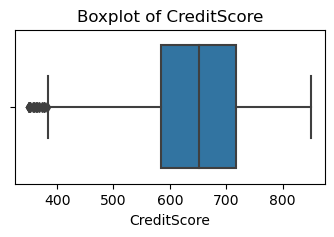

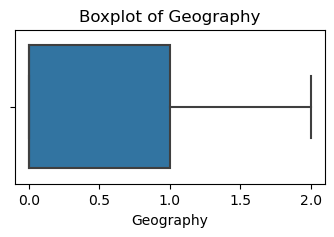

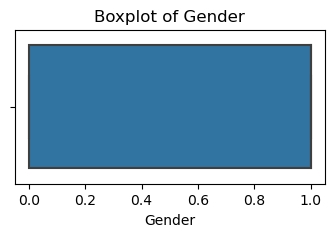

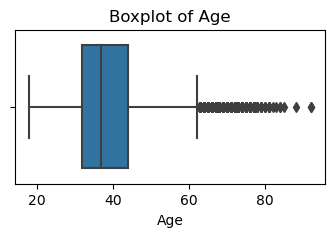

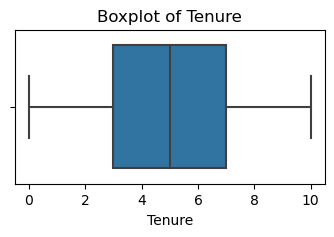

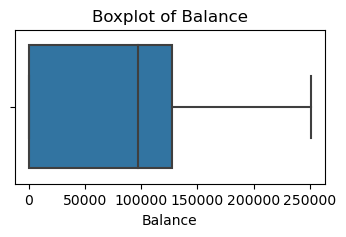

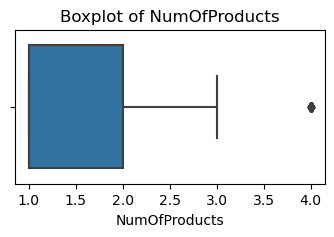

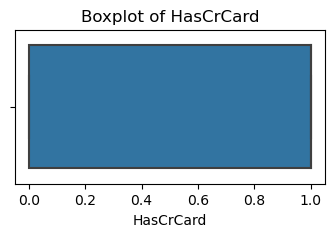

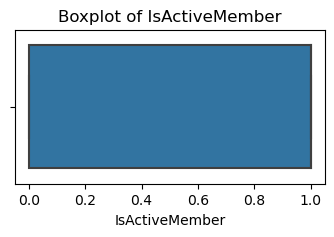

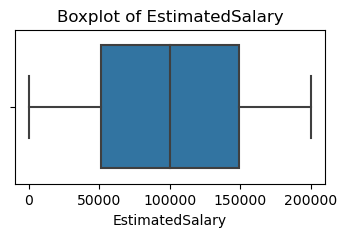

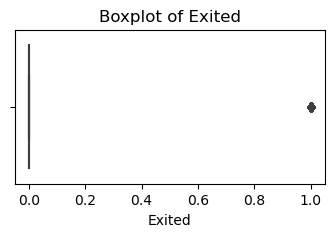

In [36]:
for col_1 in churn_data.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=churn_data[col_1])
    plt.title(f'Boxplot of {col_1}')
    plt.show()

## Checking the corellation between the data

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

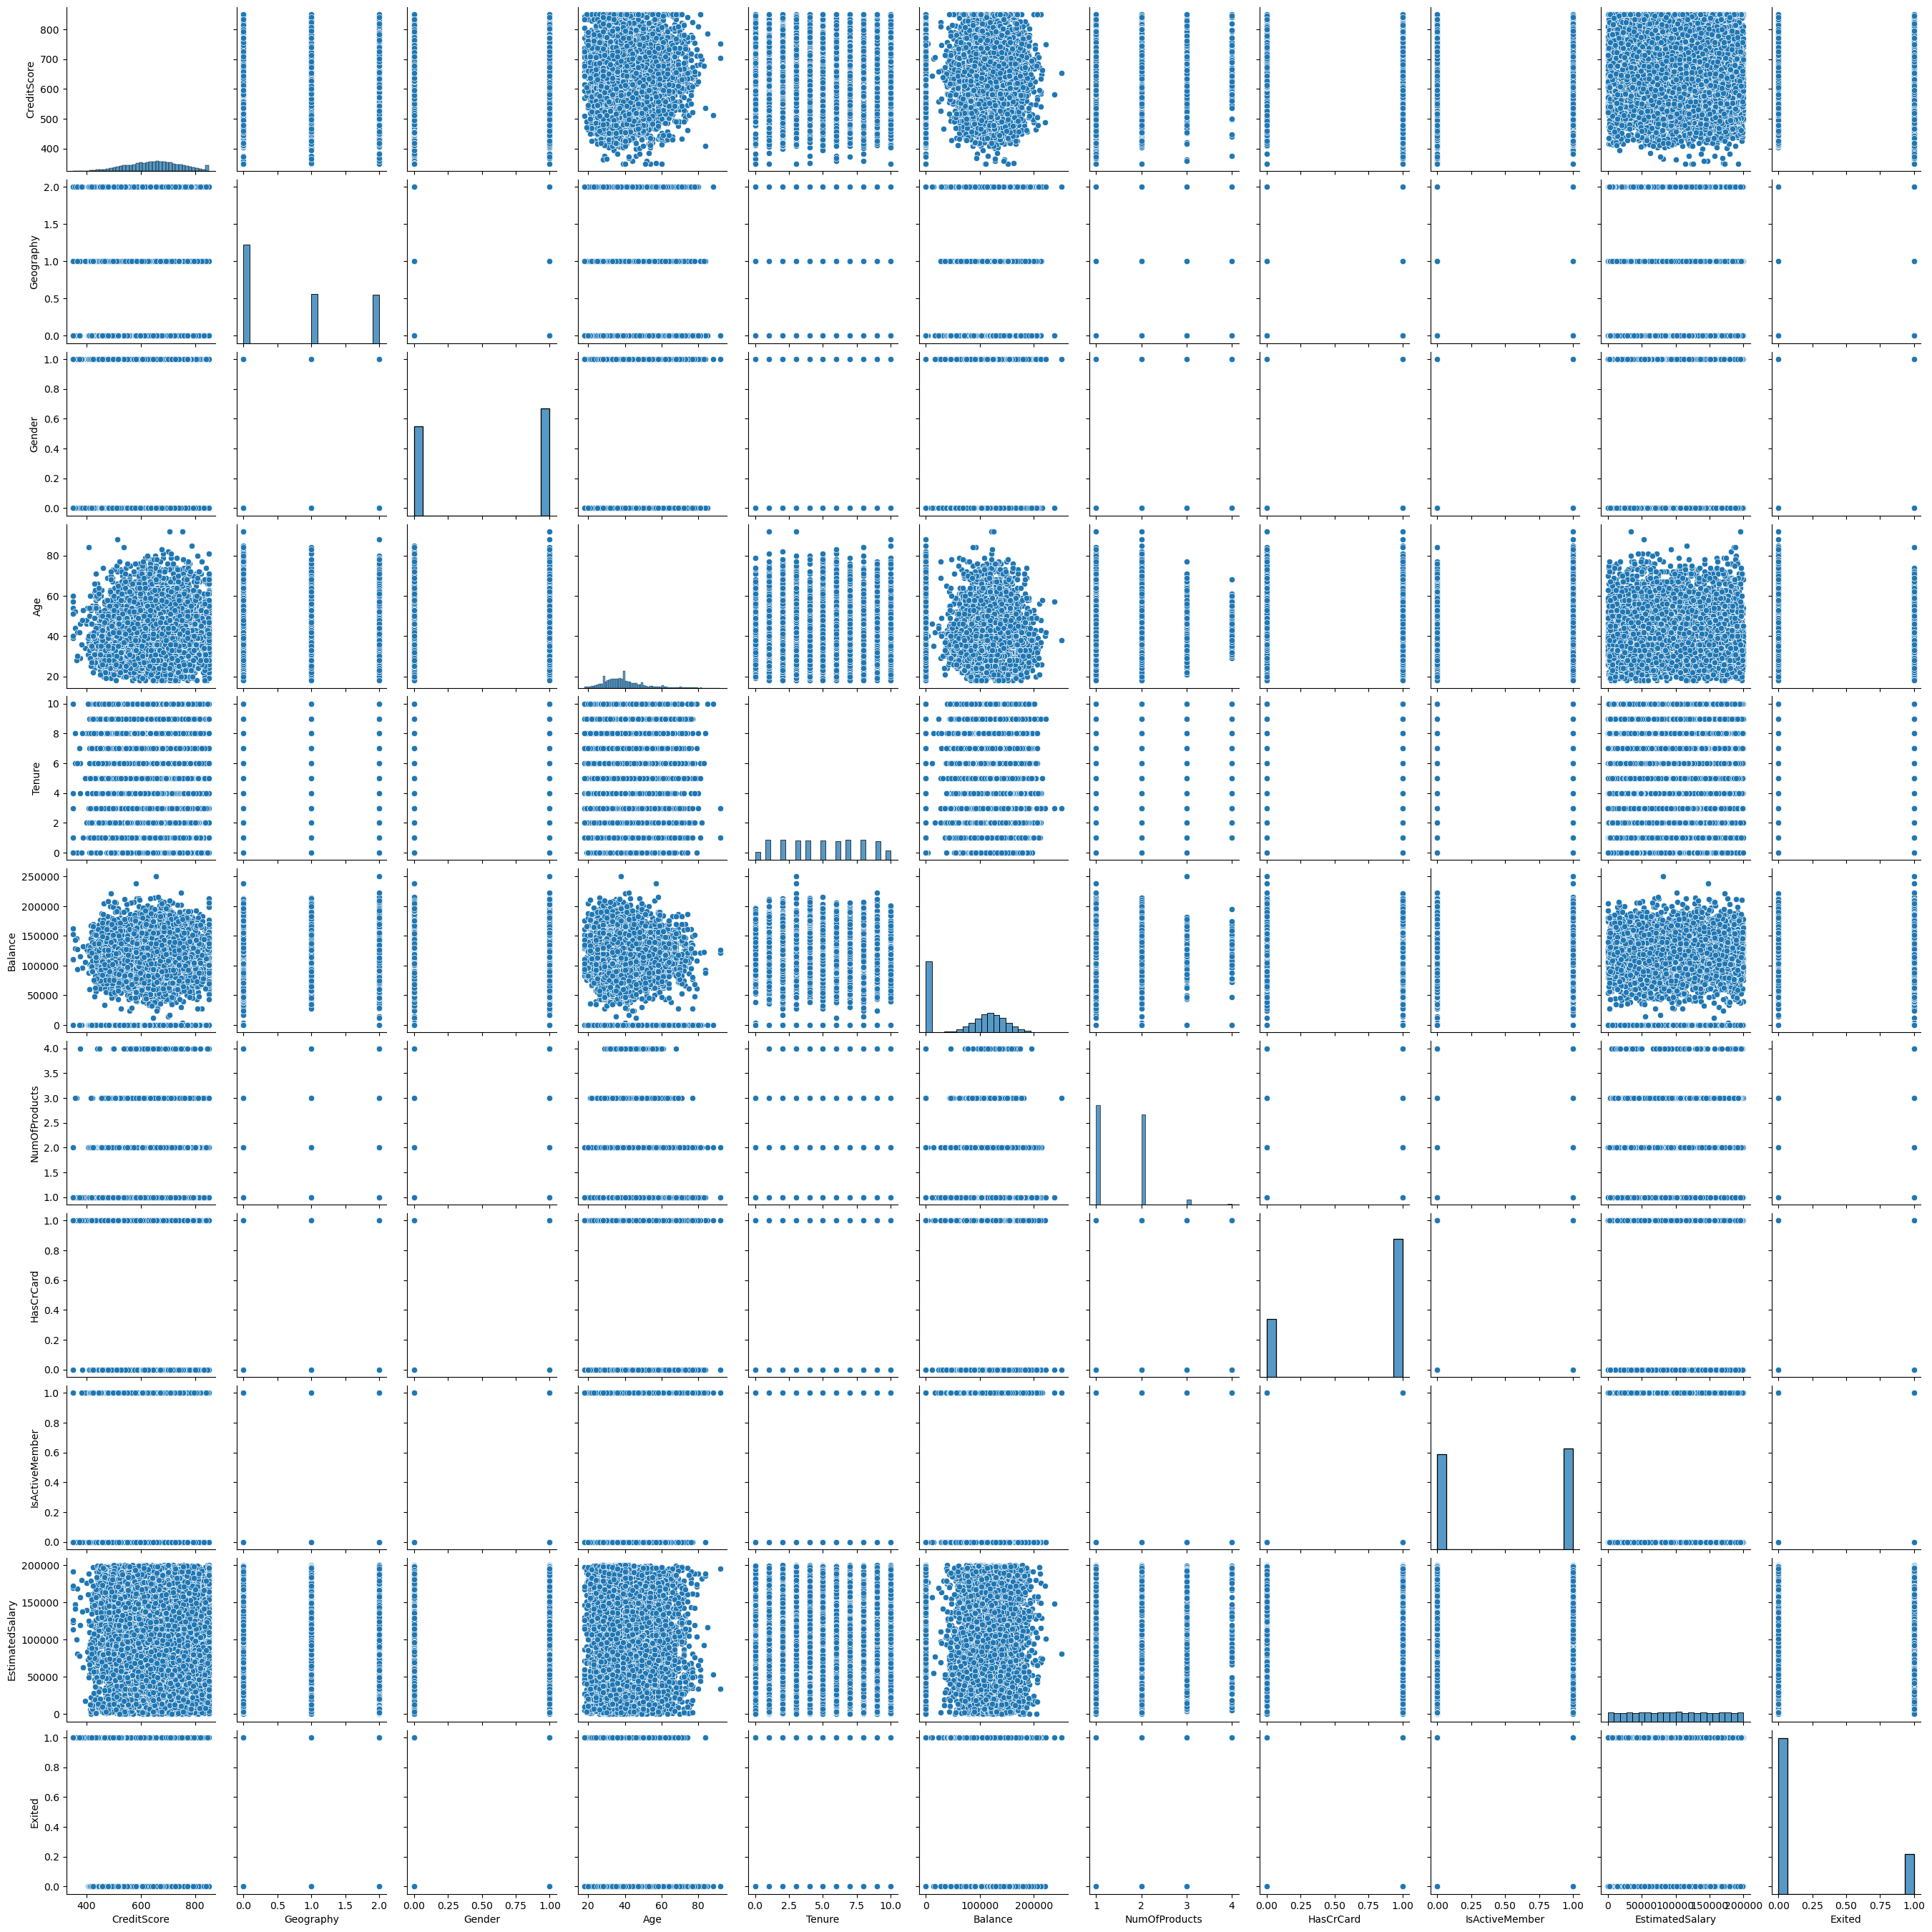

In [37]:
sns.pairplot(churn_data)
plt.show()

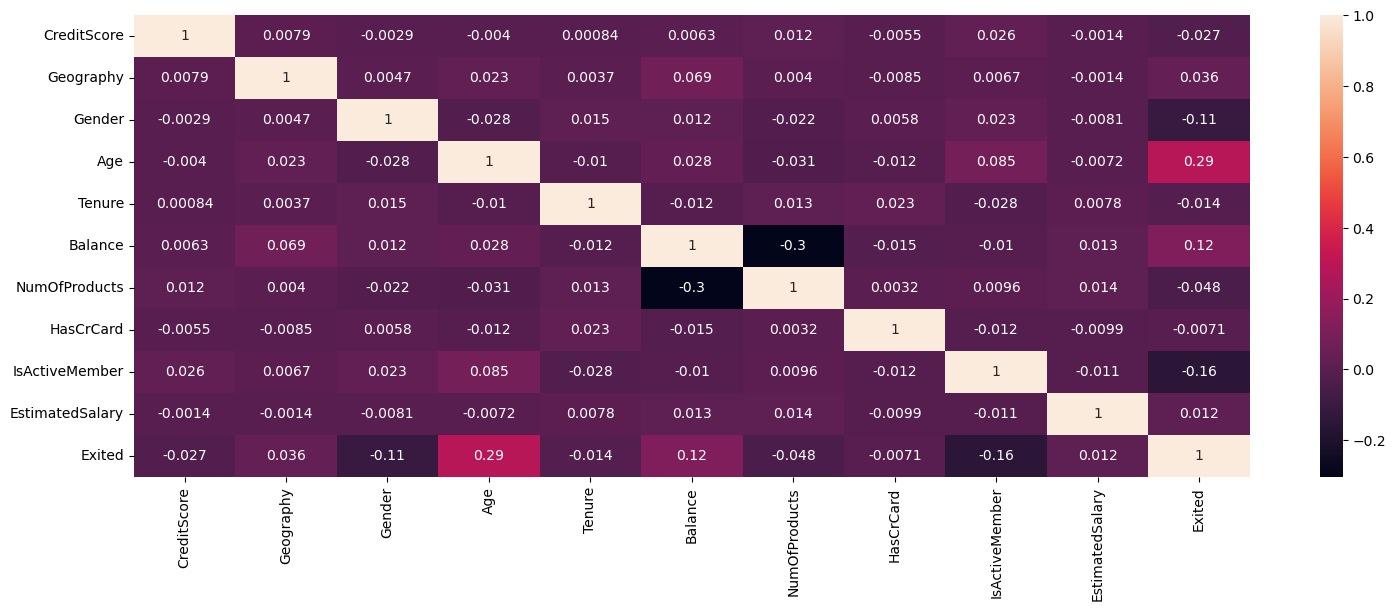

In [38]:
plt.figure(figsize=(18, 6))
sns.heatmap(churn_data.corr(),annot=True)
plt.show()

### Data Splitting

In [39]:
x = churn_data.drop('Exited',axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [40]:
y = churn_data[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [41]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

Data containes 7963 members doesn't churned

2037 members churned so it's clearly imbalenced data

**Over Sampling the Data**

In [42]:
st =SMOTETomek(random_state=42)

In [43]:
x_over,y_over = st.fit_resample(x,y)

In [44]:
y_over.value_counts()

Exited
0         6889
1         6889
Name: count, dtype: int64

Now the data is balenced so it deos not affects the results

**Scaling the data**

In [45]:
scalar = StandardScaler()

In [46]:
x_scaled = scalar.fit_transform(x_over)
x_scaled = pd.DataFrame(x_scaled,columns = x.columns)
x_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.322266,-0.906154,-0.832118,0.102757,-1.037219,-1.363763,-0.732313,0.769239,1.297163,0.022749
1,-0.440463,1.744306,-0.832118,0.002983,-1.402274,0.007303,-0.732313,-1.299986,1.297163,0.216455
2,-1.579453,-0.906154,-0.832118,0.102757,1.153111,1.248229,2.744534,0.769239,-0.770913,0.240491
3,0.537349,-0.906154,-0.832118,-0.196563,-1.402274,-1.363763,1.006110,-1.299986,-0.770913,-0.107424
4,2.159873,1.744306,-0.832118,0.202530,-1.037219,0.689548,-0.732313,0.769239,1.297163,-0.362542
...,...,...,...,...,...,...,...,...,...,...
13773,0.161268,-0.906154,-0.832118,1.000717,0.788056,0.643164,1.006110,-1.299986,1.297163,1.200419
13774,1.697830,-0.906154,-0.832118,-0.495883,1.518166,-1.363763,-0.732313,0.769239,-0.770913,-1.645387
13775,1.332493,0.419076,-0.832118,0.601624,0.057946,0.415060,-0.732313,0.769239,-0.770913,1.462632
13776,-1.977025,0.419076,-0.832118,1.499584,0.788056,0.715070,-0.732313,0.769239,-0.770913,-0.834090


In [47]:
x_scaled.skew()

CreditScore       -0.098033
Geography          0.594897
Gender             0.369674
Age                0.600112
Tenure             0.057507
Balance           -0.320055
NumOfProducts      1.124436
HasCrCard         -0.530806
IsActiveMember     0.526307
EstimatedSalary    0.004999
dtype: float64

# Modeling

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_over,test_size=.2,random_state=20)

**Logistic Regression**

In [49]:
Logistic = LogisticRegression()

In [50]:
Logistic.fit(x_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
predicted_log = Logistic.predict(x_test)

In [52]:
accuracy_score(predicted_log,y_test)

0.771044992743106

In [53]:
precision_score(predicted_log,y_test)

0.7870778267254038

In [54]:
precision_score(Logistic.predict(x_train),y_train)

0.7785417043604125

In [55]:
recall_score(predicted_log,y_test)

0.7586694975230007

In [56]:
recall_score(Logistic.predict(x_train),y_train)

0.7657946253781812

In [57]:
fbeta_score(predicted_log,y_test,beta=1)

0.7726126126126126

In [58]:
fbeta_score(Logistic.predict(x_train),y_train,beta=1)

0.7721155571505472

**Getting bit low accurecy 77% but the model was generalized**

**Random Forest**

In [59]:
ranndom = RandomForestClassifier(n_estimators=200,max_depth=8,max_samples=2000,random_state=42)

In [60]:
ranndom.fit(x_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, max_samples=2000, n_estimators=200,
                       random_state=42)

In [61]:
pred = ranndom.predict(x_test)

In [62]:
accuracy_score(pred,y_test)

0.8432510885341074

In [63]:
precision_score(pred,y_test)

0.842143906020558

In [64]:
precision_score(ranndom.predict(x_train),y_train)

0.8433146372353899

In [65]:
recall_score(ranndom.predict(x_train),y_train)

0.8527259421880717

In [66]:
recall_score(pred,y_test)

0.8409090909090909

In [67]:
fbeta_score(ranndom.predict(x_train),y_train,beta=1)

0.8479941781133449

In [68]:
fbeta_score(pred,y_test,beta=1)

0.8415260454878943

**model was slightly over fitted the data but stills it's good model with 84% of fbeta score**
* Recall rate is 84%
* Precision score is 85%

**Cross Validation**

In [69]:
cros_val_score = cross_val_score(ranndom, x_train, y_train, cv=10, scoring='accuracy')
cros_val_score.mean()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d a

0.8297958216578116

**Gradient boosting**

In [70]:
grad_boost = GradientBoostingClassifier(learning_rate=.1,n_estimators=90)

In [71]:
grad_boost.fit(x_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=90)

In [72]:
precision_score(grad_boost.predict(x_test),y_test)

0.8465491923641704

In [73]:
precision_score(grad_boost.predict(x_train),y_train)

0.8467523068572462

In [74]:
recall_score(grad_boost.predict(x_test),y_test)

0.8502949852507374

In [75]:
recall_score(grad_boost.predict(x_train),y_train)

0.850909090909091

In [76]:
fbeta_score(grad_boost.predict(x_test),y_test,beta=1)

0.8484179543782193

In [77]:
fbeta_score(grad_boost.predict(x_train),y_train,beta=1)

0.8488256098666909

**model was well generalized**
* Recall score 85% for churn rate detection it will be good it detected 85% of Flase -ve rate
* Precision score also 84.6% still good

In [78]:
cros_val_score = cross_val_score(grad_boost, x_train, y_train, cv=10, scoring='accuracy')
cros_val_score.mean()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was 

0.8347841145991876

**XGBOOST**

In [79]:
xg = xgb.XGBClassifier()

In [80]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
xg_pred = xg.predict(x_test)

In [82]:
accuracy_score(xg_pred,y_test)

0.8668359941944848

In [83]:
precision_score(xg_pred,y_test)

0.8656387665198237

In [84]:
recall_score(xg_pred,y_test)

0.8650036683785767

In [85]:
fbeta_score(xg_pred,y_test,beta=1)

0.8653211009174312

In [86]:
fbeta_score(xg.predict(x_train),y_train,beta=1)

0.959409594095941

In [87]:
accuracy_score(xg.predict(x_train),y_train)

0.9590818363273453

In [88]:
precision_score(xg.predict(x_train),y_train)

0.9643567939207527

In [89]:
recall_score(xg.predict(x_train),y_train)

0.954512893982808

the model was ove fitted

**SVM**

In [90]:
sv = SVC()

In [91]:
sv.fit(x_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [92]:
sv_pred = sv.predict(x_test)

In [93]:
accuracy_score(sv_pred,y_test)

0.8436139332365747

In [94]:
fbeta_score(sv_pred,y_test,beta=1)

0.8425283156740957

In [95]:
precision_score(sv_pred,y_test)

0.8465491923641704

In [96]:
recall_score(sv_pred,y_test)

0.8385454545454546

**Decision Tree**

In [97]:
tre = DecisionTreeClassifier(max_depth=15,max_leaf_nodes=150,random_state=42)

In [98]:
tre.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=150, random_state=42)

In [99]:
tre_predict = tre.predict(x_test)

In [100]:
accuracy_score(tre_predict,y_test)

0.8247460087082729

In [101]:
precision_score(tre_predict,y_test)

0.8179148311306902

In [102]:
precision_score(tre.predict(x_train),y_train)

0.8561606658223267

In [103]:
recall_score(tre_predict,y_test)

0.8257968865826538

In [104]:
recall_score(tre.predict(x_train),y_train)

0.8650822669104204

In [105]:
fbeta_score(tre_predict,y_test,beta=1)

0.8218369605311693

In [106]:
fbeta_score(tre.predict(x_train),y_train,beta=1)

0.8605983450031827

**converting the data into normal distribution**

In [107]:
from sklearn.preprocessing import PowerTransformer

In [108]:
x_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.322266,-0.906154,-0.832118,0.102757,-1.037219,-1.363763,-0.732313,0.769239,1.297163,0.022749
1,-0.440463,1.744306,-0.832118,0.002983,-1.402274,0.007303,-0.732313,-1.299986,1.297163,0.216455
2,-1.579453,-0.906154,-0.832118,0.102757,1.153111,1.248229,2.744534,0.769239,-0.770913,0.240491
3,0.537349,-0.906154,-0.832118,-0.196563,-1.402274,-1.363763,1.006110,-1.299986,-0.770913,-0.107424
4,2.159873,1.744306,-0.832118,0.202530,-1.037219,0.689548,-0.732313,0.769239,1.297163,-0.362542
...,...,...,...,...,...,...,...,...,...,...
13773,0.161268,-0.906154,-0.832118,1.000717,0.788056,0.643164,1.006110,-1.299986,1.297163,1.200419
13774,1.697830,-0.906154,-0.832118,-0.495883,1.518166,-1.363763,-0.732313,0.769239,-0.770913,-1.645387
13775,1.332493,0.419076,-0.832118,0.601624,0.057946,0.415060,-0.732313,0.769239,-0.770913,1.462632
13776,-1.977025,0.419076,-0.832118,1.499584,0.788056,0.715070,-0.732313,0.769239,-0.770913,-0.834090


In [109]:
y_over

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
13773,1
13774,1
13775,1
13776,1


In [110]:
x_scaled.skew()

CreditScore       -0.098033
Geography          0.594897
Gender             0.369674
Age                0.600112
Tenure             0.057507
Balance           -0.320055
NumOfProducts      1.124436
HasCrCard         -0.530806
IsActiveMember     0.526307
EstimatedSalary    0.004999
dtype: float64

In [111]:
cred = np.absolute(x_scaled[['CreditScore']])
cred.skew()

CreditScore    0.788649
dtype: float64

In [112]:
box =  PowerTransformer(method='yeo-johnson')

In [113]:
creditScore = box.fit_transform(cred)
creditScore = pd.DataFrame(creditScore,columns=cred.columns)
creditScore.skew()

CreditScore    0.033961
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\3758189251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditScore,kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


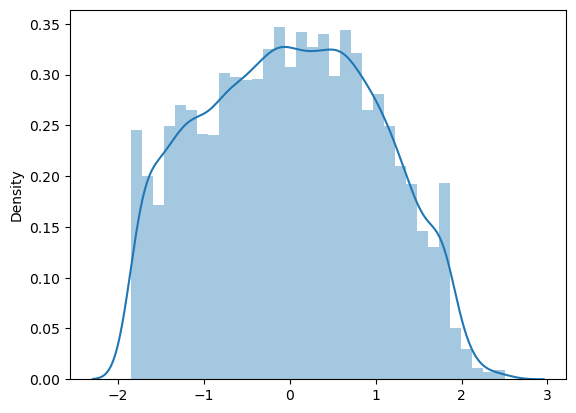

In [114]:
sns.distplot(creditScore,kde=True)
plt.show()

In [115]:
geogr = np.absolute(x_scaled[['Geography']])
geogr.skew()

Geography    0.80972
dtype: float64

In [116]:
geography = box.fit_transform(geogr)
geography = pd.DataFrame(geography,columns=x_scaled.columns[[1]])
geography.skew()

Geography    0.081635
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2933385708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(geography,kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


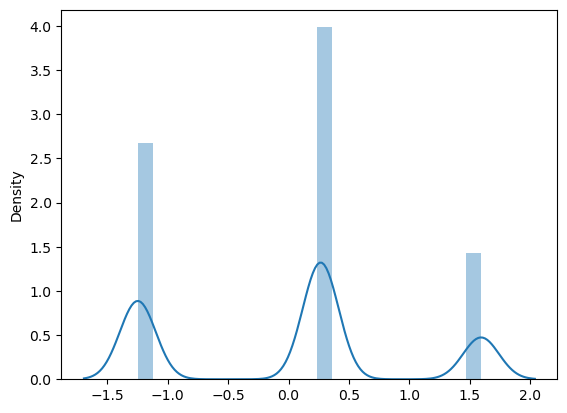

In [117]:
sns.distplot(geography,kde=True)
plt.show()

In [118]:
age = np.absolute(x_scaled[['Age']])
age.skew()

Age    1.306555
dtype: float64

In [119]:
Age = box.fit_transform(age)
Age = pd.DataFrame(Age,columns=x_scaled.columns[[3]])
Age.isnull().sum()

Age    0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2144972846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age,kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


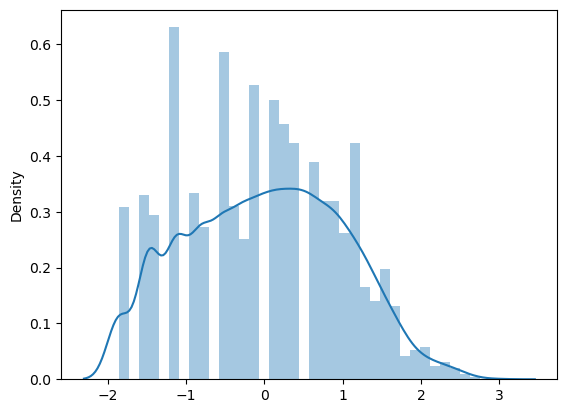

In [120]:
sns.distplot(Age,kde=True)
plt.show()

In [121]:
balnc = np.square(x_scaled[['Balance']])
balnc.skew()

Balance    0.570528
dtype: float64

In [122]:
Balance = box.fit_transform(balnc)
Balance = pd.DataFrame(Balance,columns=x_scaled.columns[[5]])
Balance.skew()

Balance    0.009827
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\4042756200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Balance,kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


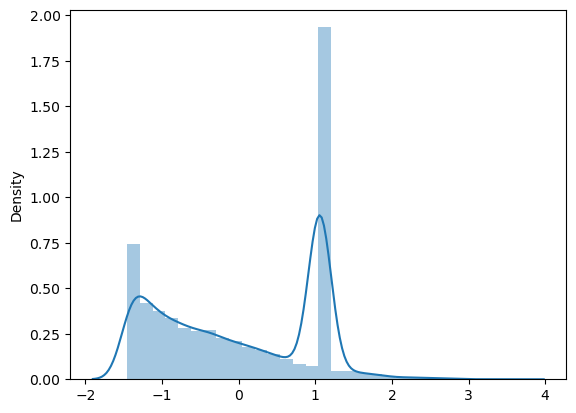

In [123]:
sns.distplot(Balance,kde=True)
plt.show()

In [124]:
num_of = np.sin(x_scaled[['NumOfProducts']])
num_of.skew()

NumOfProducts    0.531565
dtype: float64

In [125]:
NumOfProducts = box.fit_transform(num_of)
NumOfProducts = pd.DataFrame(NumOfProducts,columns=x_scaled.columns[[6]])
NumOfProducts.skew()

NumOfProducts    0.500122
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17796\3470080825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NumOfProducts,kde=True)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


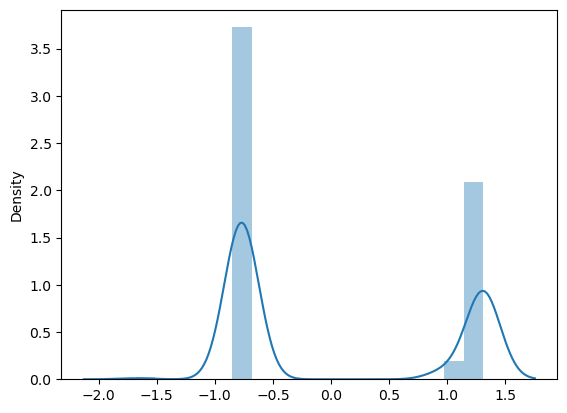

In [126]:
sns.distplot(NumOfProducts,kde=True)
plt.show()

In [127]:
Age.isnull().sum()

Age    0
dtype: int64

In [128]:
card = np.sin(x_scaled[['IsActiveMember']])
card.skew()

IsActiveMember    0.526307
dtype: float64

In [129]:
x_scaled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [130]:
new_data = pd.concat([creditScore,geography,x_scaled[['Gender']],Age,x_scaled[['Tenure']],Balance,x_scaled[['NumOfProducts']],x_scaled[['HasCrCard']],x_scaled[['IsActiveMember']],x_scaled[['EstimatedSalary']],y_over],axis=1)
new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.821226,0.266390,-0.832118,-1.463424,-1.037219,1.058021,-0.732313,0.769239,1.297163,0.022749,1
1,-0.526298,1.595012,-0.832118,-1.859105,-1.402274,-1.457697,-0.732313,-1.299986,1.297163,0.216455,0
2,1.262736,0.266390,-0.832118,-1.463424,1.153111,0.797207,2.744534,0.769239,-0.770913,0.240491,1
3,-0.307888,0.266390,-0.832118,-1.139213,-1.402274,1.058021,1.006110,-1.299986,-0.770913,-0.107424,0
4,1.805285,1.595012,-0.832118,-1.119933,-1.037219,-0.511163,-0.732313,0.769239,1.297163,-0.362542,0
...,...,...,...,...,...,...,...,...,...,...,...
13773,-1.285630,0.266390,-0.832118,0.594633,0.788056,-0.614430,1.006110,-1.299986,1.297163,1.200419,1
13774,1.386016,0.266390,-0.832118,-0.324622,1.518166,1.058021,-0.732313,0.769239,-0.770913,-1.645387,1
13775,0.979106,-1.249057,-0.832118,-0.095078,0.057946,-1.068791,-0.732313,0.769239,-0.770913,1.462632,1
13776,1.649906,-1.249057,-0.832118,1.203946,0.788056,-0.453338,-0.732313,0.769239,-0.770913,-0.834090,1


In [131]:
new_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**scling the new modified data**

In [132]:
scaled_new_data = scalar.fit_transform(new_data)
scaled_new_data = pd.DataFrame(scaled_new_data,columns = new_data.columns)

In [133]:
scaled_new_data.skew()

CreditScore        0.033961
Geography          0.081635
Gender             0.369674
Age                0.043920
Tenure             0.057507
Balance            0.009827
NumOfProducts      1.124436
HasCrCard         -0.530806
IsActiveMember     0.526307
EstimatedSalary    0.004999
Exited             0.000000
dtype: float64

**Removing the outliers from the data**

In [134]:
from scipy.stats import zscore

In [135]:
z_scores = zscore(new_data)

In [136]:
abs_z_scores = abs(z_scores)
threshold = 3

In [137]:
outlier_rows = (abs_z_scores > threshold).any(axis=1)
outliers = scaled_new_data[outlier_rows]
outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,2.349087,-1.249057,-0.832118,0.856656,-0.307109,-0.876461,4.482957,0.769239,-0.770913,0.334203,1.0
58,0.459032,-1.249057,1.201752,1.397161,-1.037219,-0.200124,4.482957,0.769239,-0.770913,-1.240080,1.0
1092,-1.090331,0.266390,-0.832118,-0.311001,-1.402274,-0.714433,4.482957,0.769239,-0.770913,-1.189925,1.0
1278,1.512257,-1.249057,-0.832118,0.279604,-1.402274,-0.686260,4.482957,-1.299986,-0.770913,1.144376,1.0
1294,-0.239675,1.595012,1.201752,0.726322,0.423001,-0.661918,4.482957,0.769239,-0.770913,-1.005635,1.0
1626,-1.497308,-1.249057,1.201752,-1.139213,1.518166,-0.282062,4.482957,-1.299986,1.297163,-1.610275,1.0
1814,-1.608616,1.595012,1.201752,-0.835233,-0.672164,3.534406,2.744534,-1.299986,1.297163,-0.328453,1.0
1844,-0.194619,0.266390,1.201752,0.434141,0.788056,-0.426654,4.482957,-1.299986,-0.770913,1.461063,1.0
1969,-1.154044,-1.249057,1.201752,0.443567,-0.672164,-0.367008,4.482957,0.769239,1.297163,-0.904339,1.0
2124,-1.027595,0.266390,-0.832118,0.864157,1.518166,1.155094,4.482957,0.769239,1.297163,0.818129,1.0


In [138]:
clean_data = scaled_new_data.drop(churn_data[outlier_rows].index)

C:\Users\user\AppData\Local\Temp\ipykernel_17796\2633667349.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data = scaled_new_data.drop(churn_data[outlier_rows].index)


In [139]:
clean_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.821226,0.266390,-0.832118,-1.463424,-1.037219,1.058021,-0.732313,0.769239,1.297163,0.022749,1.0
1,-0.526298,1.595012,-0.832118,-1.859105,-1.402274,-1.457697,-0.732313,-1.299986,1.297163,0.216455,-1.0
2,1.262736,0.266390,-0.832118,-1.463424,1.153111,0.797207,2.744534,0.769239,-0.770913,0.240491,1.0
3,-0.307888,0.266390,-0.832118,-1.139213,-1.402274,1.058021,1.006110,-1.299986,-0.770913,-0.107424,-1.0
4,1.805285,1.595012,-0.832118,-1.119933,-1.037219,-0.511163,-0.732313,0.769239,1.297163,-0.362542,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
13773,-1.285630,0.266390,-0.832118,0.594633,0.788056,-0.614430,1.006110,-1.299986,1.297163,1.200419,1.0
13774,1.386016,0.266390,-0.832118,-0.324622,1.518166,1.058021,-0.732313,0.769239,-0.770913,-1.645387,1.0
13775,0.979106,-1.249057,-0.832118,-0.095078,0.057946,-1.068791,-0.732313,0.769239,-0.770913,1.462632,1.0
13776,1.649906,-1.249057,-0.832118,1.203946,0.788056,-0.453338,-0.732313,0.769239,-0.770913,-0.834090,1.0


In [140]:
e = clean_data.drop('Exited',axis=1)
e

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.821226,0.266390,-0.832118,-1.463424,-1.037219,1.058021,-0.732313,0.769239,1.297163,0.022749
1,-0.526298,1.595012,-0.832118,-1.859105,-1.402274,-1.457697,-0.732313,-1.299986,1.297163,0.216455
2,1.262736,0.266390,-0.832118,-1.463424,1.153111,0.797207,2.744534,0.769239,-0.770913,0.240491
3,-0.307888,0.266390,-0.832118,-1.139213,-1.402274,1.058021,1.006110,-1.299986,-0.770913,-0.107424
4,1.805285,1.595012,-0.832118,-1.119933,-1.037219,-0.511163,-0.732313,0.769239,1.297163,-0.362542
...,...,...,...,...,...,...,...,...,...,...
13773,-1.285630,0.266390,-0.832118,0.594633,0.788056,-0.614430,1.006110,-1.299986,1.297163,1.200419
13774,1.386016,0.266390,-0.832118,-0.324622,1.518166,1.058021,-0.732313,0.769239,-0.770913,-1.645387
13775,0.979106,-1.249057,-0.832118,-0.095078,0.057946,-1.068791,-0.732313,0.769239,-0.770913,1.462632
13776,1.649906,-1.249057,-0.832118,1.203946,0.788056,-0.453338,-0.732313,0.769239,-0.770913,-0.834090


In [141]:
e_scaled = scalar.fit_transform(e)
e_scaled = pd.DataFrame(e_scaled,columns=e.columns)
e_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.821523,0.265848,-0.832586,-1.463988,-1.037258,1.058411,-0.743261,0.769546,1.299062,0.022918
1,-0.526496,1.594405,-0.832586,-1.859948,-1.402422,-1.458363,-0.743261,-1.299467,1.299062,0.216605
2,1.263132,0.265848,-0.832586,-1.463988,1.153727,0.797487,2.873531,0.769546,-0.769786,0.240639
3,-0.308014,0.265848,-0.832586,-1.139547,-1.402422,1.058411,1.065135,-1.299467,-0.769786,-0.107241
4,1.805862,1.594405,-0.832586,-1.120254,-1.037258,-0.511432,-0.743261,0.769546,1.299062,-0.362333
...,...,...,...,...,...,...,...,...,...,...
13715,-1.286081,0.265848,-0.832586,0.595524,0.788563,-0.614743,1.065135,-1.299467,1.299062,1.200469
13716,1.386454,0.265848,-0.832586,-0.324381,1.518892,1.058411,-0.743261,0.769546,-0.769786,-1.645048
13717,0.979408,-1.249525,-0.832586,-0.094674,0.058235,-1.069294,-0.743261,0.769546,-0.769786,1.462655
13718,1.650432,-1.249525,-0.832586,1.205267,0.788563,-0.453583,-0.743261,0.769546,-0.769786,-0.833833


In [142]:
f = clean_data[['Exited']]
f

,Exited
0,1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
...,...
13773,1.0
13774,1.0
13775,1.0
13776,1.0


In [143]:
e_over,f_over = st.fit_resample(e,f)
e_over

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.821226,0.266390,-0.832118,-1.463424,-1.037219,1.058021,-0.732313,0.769239,1.297163,0.022749
1,1.262736,0.266390,-0.832118,-1.463424,1.153111,0.797207,2.744534,0.769239,-0.770913,0.240491
2,-0.307888,0.266390,-0.832118,-1.139213,-1.402274,1.058021,1.006110,-1.299986,-0.770913,-0.107424
3,1.805285,1.595012,-0.832118,-1.119933,-1.037219,-0.511163,-0.732313,0.769239,1.297163,-0.362542
4,1.542608,0.266390,1.201752,0.443567,0.788056,1.058021,1.006110,0.769239,1.297163,-1.556952
...,...,...,...,...,...,...,...,...,...,...
12357,0.718168,-0.478345,-0.832118,1.420191,-1.030962,0.781454,2.744534,0.769239,1.297163,0.422516
12358,-1.358002,-1.249057,-0.832118,-0.863331,-0.672164,-0.890335,-0.732313,0.769239,1.297163,0.094780
12359,-1.599667,0.266390,1.201752,-0.621502,0.148951,0.889375,-0.732313,0.769239,-0.770913,0.877140
12360,-0.753986,0.266390,-0.832118,-0.818212,1.302923,0.159627,-0.732313,-1.299986,1.297163,1.207862


In [144]:
f_over

,Exited
0,1.0
1,1.0
2,-1.0
3,-1.0
4,-1.0
...,...
12357,1.0
12358,1.0
12359,1.0
12360,1.0


In [145]:
e_scaled =scalar.fit_transform(e_over)
e_scaled

array([[-0.83294269,  0.26661402, -0.82910475, ...,  0.77612971,
         1.30327949,  0.02693914],
       [ 1.25045889,  0.26661402, -0.82910475, ...,  0.77612971,
        -0.76729512,  0.24407394],
       [-0.31974256,  0.26661402, -0.82910475, ..., -1.28848889,
        -0.76729512, -0.10286953],
       ...,
       [-1.61117415,  0.26661402,  1.20612021, ...,  0.77612971,
        -0.76729512,  0.87894459],
       [-0.76572024,  0.26661402, -0.82910475, ..., -1.28848889,
         1.30327949,  1.2087441 ],
       [ 1.27925425, -1.24723917, -0.82910475, ...,  0.77612971,
        -0.76729512,  0.86313637]])

In [146]:
e_scaled = pd.DataFrame(e_scaled,columns=e.columns)
e_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.832943,0.266614,-0.829105,-1.462451,-1.037327,1.042676,-0.746745,0.776130,1.303279,0.026939
1,1.250459,0.266614,-0.829105,-1.462451,1.148570,0.781823,2.839544,0.776130,-0.767295,0.244074
2,-0.319743,0.266614,-0.829105,-1.139583,-1.401643,1.042676,1.046399,-1.288489,-0.767295,-0.102870
3,1.792862,1.593838,-0.829105,-1.120383,-1.037327,-0.526742,-0.746745,0.776130,1.303279,-0.357276
4,1.530256,0.266614,1.206120,0.436639,0.784254,1.042676,1.046399,0.776130,1.303279,-1.548351
...,...,...,...,...,...,...,...,...,...,...
12357,0.706037,-0.477338,-0.829105,1.409218,-1.031082,0.766067,2.839544,0.776130,1.303279,0.425590
12358,-1.369574,-1.247239,-0.829105,-0.864844,-0.673011,-0.905971,-0.746745,0.776130,1.303279,0.098769
12359,-1.611174,0.266614,1.206120,-0.624017,0.146443,0.874004,-0.746745,0.776130,-0.767295,0.878945
12360,-0.765720,0.266614,-0.829105,-0.819912,1.298079,0.144148,-0.746745,-1.288489,1.303279,1.208744


In [147]:
f_over

,Exited
0,1.0
1,1.0
2,-1.0
3,-1.0
4,-1.0
...,...
12357,1.0
12358,1.0
12359,1.0
12360,1.0


In [148]:
c_train,c_test,d_train,d_test = train_test_split(e_scaled,f_over,test_size=.2,random_state=42)

In [149]:
ranndom_ = RandomForestClassifier(n_estimators=150,max_depth=10,max_samples=.35,random_state=42)

In [150]:
ranndom_.fit(c_train,d_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, max_samples=0.35, n_estimators=150,
                       random_state=42)

In [151]:
fbeta_score(ranndom_.predict(c_test),d_test,beta=1)

0.8334002408671216

In [152]:
precision_score(ranndom_.predict(c_test),d_test)

0.8494271685761048

In [153]:
recall_score(ranndom_.predict(c_test),d_test)

0.817966903073286

In [154]:
fbeta_score(ranndom_.predict(c_train),d_train,beta = 1)

0.8841365461847389

After removel of outliers getting bit low score

In [156]:
print(f'Random forest score {fbeta_score(pred,y_test,beta=1)}')
print(f'Gboost score {fbeta_score(grad_boost.predict(x_test),y_test,beta=.1)}')

Random forest score 0.8415260454878943
Gboost score 0.846586117653901


In [ ]:
over all Gradient boosting getting the best results and it's well generalised model